# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries
import random
import pandas as pd
import matplotlib
%matplotlib inline

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
# your code here
lista = [1,2,3,4,5,6]
def dices():
    lista = [1,2,3,4,5,6]
    lista1 = []
    for x in range (0,10):
        lista1.append(random.choice(lista))
    return  pd.DataFrame(lista1)

In [3]:
lista1 = dices()

In [4]:
lista1 = lista1.sort_values(0).reset_index().drop(['index'], axis=1)

In [5]:
lista1

,0
0,1
1,1
2,3
3,3
4,4
5,4
6,5
7,6
8,6
9,6


#### 2.- Plot the results sorted by value.

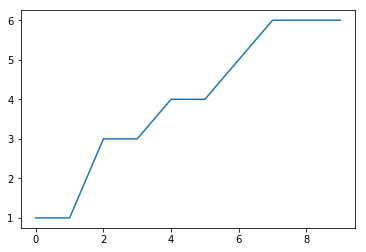

In [6]:
# your code here

matplotlib.pyplot.plot(lista1)

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

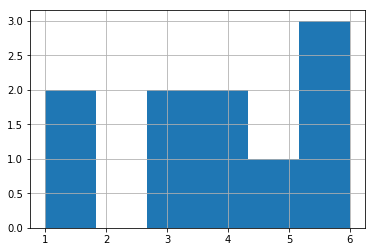

In [7]:
# your code here
lista1[0].hist(bins = 6)

In [8]:
"""
The first one has the index values in the x axis and the values from column 0 in the y axis.
The histogram counts how many times appears each value from column 0.
"""

'\nThe first one has the index values in the x axis and the values from column 0 in the y axis.\nThe histogram counts how many times appears each value from column 0.\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [9]:
# your code here

mean = lista1[0].sum() / len(lista1)

In [10]:
mean

3.9

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [11]:
# your code here
lista2 = []

for x in lista1[0]:
    lista2.append(x)

In [12]:
def mean(list):
   sum = 0
   count = 0
   for x in list:
       sum = sum + x
       count = count + 1
   return sum / count

In [13]:
mean(lista2)

3.8999999999999999

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [14]:
# your code here

def find_median(sorted_list):
   indices = []
   list_size = len(sorted_list)
   median = 0
   if list_size % 2 == 0:
       indices.append(int(list_size / 2) - 1)  # -1 because index starts from 0
       indices.append(int(list_size / 2))
       median = (sorted_list[indices[0]] + sorted_list[indices[1]]) / 2
       pass
   else:
       indices.append(int(list_size / 2))
       median = sorted_list[indices[0]]
       pass
   return median, indices
   pass

In [15]:
find_median(lista2)

(4.0, [4, 5])

In [16]:
lista2

[1, 1, 3, 3, 4, 4, 5, 6, 6, 6]

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [17]:
# your code here
def cuartil():
    for x in lista2:
        

SyntaxError: unexpected EOF while parsing (<ipython-input-17-6aaa3e432554>, line 4)

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [37]:
# your code here
fd = pd.read_csv('/Users/andressalomferrer/Desktop/ironhack/lab/Week_4_labs/Day_2/lab-understanding-descriptive-stats/data/roll_the_dice_hundred.csv')

In [39]:
fd = fd.sort_values('value')

In [40]:
fd

,Unnamed: 0,roll,value
0,0,0,1
47,47,47,1
56,56,56,1
9,9,9,1
73,73,73,1
63,63,63,1
26,26,26,1
89,89,89,1
3,3,3,1
94,94,94,1


In [51]:
fd_1 = fd.reset_index(drop = True).drop(['Unnamed: 0', 'roll'], axis=1)

In [52]:
fd_2 = fd_1.reset_index()

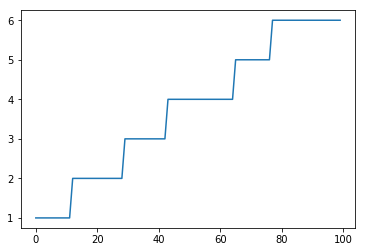

In [53]:
matplotlib.pyplot.plot(fd_1)

In [54]:
"""
we see how many times each number appears
"""

'\nwe see how many times each number appears\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [64]:
# your code here
sum(fd_2['value'])/len(fd_2['value'])

3.7400000000000002

In [101]:
fd_2

,index,value
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1
5,5,1
6,6,1
7,7,1
8,8,1
9,9,1


#### 3.- Now, calculate the frequency distribution.


In [99]:
# your code here
lista_1 = []
for x in [1,2,3,4,5,6]:
    lista_1.append((fd_2[fd_2['value'] == x].count()).value)

In [100]:
lista_1

[12, 17, 14, 22, 12, 23]

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

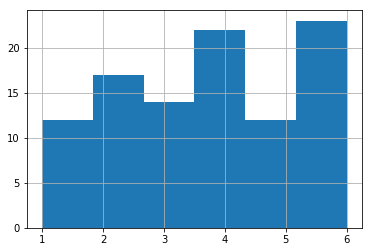

In [103]:
# your code here
fd_2['value'].hist(bins = 6)

In [ ]:
"""
y axis is the frequency of each number appearing and x axis is each number
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [105]:
# your code here

fd_3 = pd.read_csv('/Users/andressalomferrer/Desktop/ironhack/lab/Week_4_labs/Day_2/lab-understanding-descriptive-stats/data/roll_the_dice_thousand.csv')


In [106]:
lista_2 = []
for x in [1,2,3,4,5,6]:
    lista_2.append((fd_3[fd_3['value'] == x].count()).value)

In [107]:
lista_2

[175, 167, 175, 168, 149, 166]

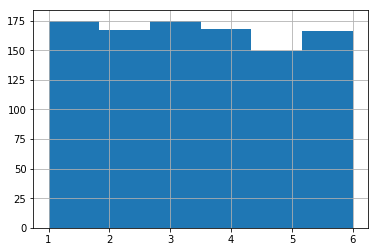

In [108]:
fd_3['value'].hist(bins = 6)

In [110]:
"""

it's more even because the probability for each die is the same 1/6 and the more 
times you throw the die, the more even is the histogram

"""

"\n\nit's more even because the probability for each die is the same 1/6 and the more \ntimes you throw the die, the more even is the histogram\n\n"

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [112]:
# your code here

df_2 = pd.read_csv('/Users/andressalomferrer/Desktop/ironhack/lab/Week_4_labs/Day_2/lab-understanding-descriptive-stats/data/ages_population.csv')


In [125]:
df_2

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0
5,27.0
6,39.0
7,12.0
8,42.0
9,33.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1132cc3c8>]], dtype=object)

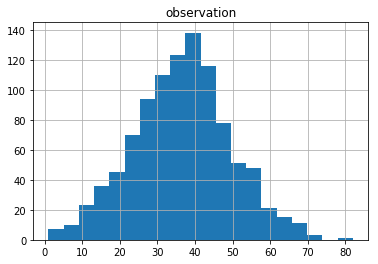

In [127]:
df_2.hist(bins = 20)

In [124]:
frec = df_2['observation'].value_counts()

In [123]:
pd.DataFrame(frec)

,observation
39.0,45
41.0,36
30.0,34
35.0,33
43.0,32
42.0,32
36.0,31
38.0,30
32.0,30
37.0,30


#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [128]:
# your code here

df_2.describe()

,observation
count,1000.0000
mean,36.5600
std,12.8165
min,1.0000
25%,28.0000
50%,37.0000
75%,45.0000
max,82.0000


In [132]:
"""Yes"""

'Yes'

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [136]:
# your code here
df_3 = pd.read_csv('/Users/andressalomferrer/Desktop/ironhack/lab/Week_4_labs/Day_2/lab-understanding-descriptive-stats/data/ages_population2.csv')


observation    1000
dtype: int64

In [142]:
df_3['observation'].sort_values().value_counts()

28.0    139
27.0    125
26.0    120
29.0    115
25.0     98
30.0     90
24.0     78
31.0     61
23.0     41
22.0     35
32.0     31
33.0     22
21.0     17
20.0     13
34.0      7
19.0      3
35.0      3
36.0      2
Name: observation, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11377cd30>]], dtype=object)

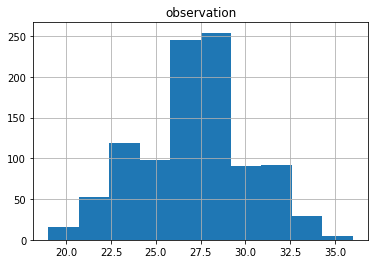

In [143]:
df_3.hist()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [144]:
"""
The range of age is from 19-36 (aprox.)
"""

'\nThe range of age is from 19-36 (aprox.)\n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [146]:
# your code here
df_3.describe()

,observation
count,1000.000000
mean,27.155000
std,2.969814
min,19.000000
25%,25.000000
50%,27.000000
75%,29.000000
max,36.000000


In [ ]:
"""
The range is less wide so the data is more concentrated 

"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [147]:
# your code here

df_4 = pd.read_csv('/Users/andressalomferrer/Desktop/ironhack/lab/Week_4_labs/Day_2/lab-understanding-descriptive-stats/data/ages_population3.csv')


#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [150]:
# your code here

df_4['observation'].sort_values().value_counts()

32.0    37
35.0    31
37.0    31
39.0    29
36.0    26
41.0    25
48.0    25
29.0    25
38.0    25
30.0    24
45.0    24
43.0    22
46.0    22
67.0    22
40.0    21
50.0    21
31.0    21
34.0    20
70.0    19
27.0    19
24.0    19
66.0    19
49.0    18
28.0    18
25.0    17
33.0    17
44.0    17
68.0    17
69.0    17
52.0    17
        ..
17.0    10
56.0    10
54.0     9
16.0     9
18.0     9
15.0     8
57.0     8
72.0     8
59.0     8
74.0     6
73.0     6
61.0     6
60.0     6
58.0     6
14.0     5
12.0     4
62.0     3
2.0      2
4.0      2
11.0     2
10.0     2
77.0     2
13.0     2
75.0     2
9.0      1
8.0      1
7.0      1
5.0      1
76.0     1
1.0      1
Name: observation, Length: 75, dtype: int64

In [151]:
df_4.describe()

,observation
count,1000.000000
mean,41.989000
std,16.144706
min,1.000000
25%,30.000000
50%,40.000000
75%,53.000000
max,77.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11389f8d0>]], dtype=object)

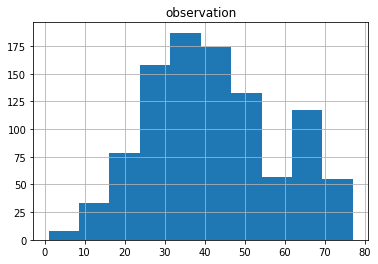

In [153]:
df_4.hist()

In [ ]:
"""
Data is more spread out. std = 16 """

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [154]:
# your code here

quartil1 = 30
quartil2 = 40
quiartil3 = 53

In [ ]:
"""
Not a lot of difference. Median = 40 mean = 41.9. this is because data is more or less even in both sides. So mean and median are similar.

"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""